# Course 6 TikTok project

**=================================================================================================================**

## Project Description

The data team at TikTok are close to completing the claims classification project. Earlier, the data team completed a project proposal, and used Python to explore and analyze the claims dataset, created data visualizations, and conducted a statistical test. Most recently, the team built a logistic regression model to predict whether statements are claims or opinions within submissions, based on the ‘verified_status’ variable within the claims dataset. 

Operations Manager, Maika Abadi mentioned that there are some questions from stakeholders in other departments, which he would like to share before the process of building the final begins.

Data Science Lead, Willow Jaffey determined that an effective final model could be approached in several ways, such as Naive Bayes or tree-based models. However, Willow and the team have decided to develop a random forest model during the evaluation stage for this project. 

## Data sources used

We will use the new dataset after applying SMOTE+ENN algorithm to balance the datasets

## Data Tasks

- Load Data
- Perform GridSearchCV or RandomSearch CV
- Apply best hyperparameters into model
- Evaluate the model
- Perform Cross Validation
- Record results

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df2 = pd.read_csv("tiktoksmenn.csv")

In [3]:
df2.shape

(25337, 8)

In [4]:
df2.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.10,0.69,-0.21,1.91,2.04,1,0,0
1,0.20,-0.42,-0.44,-0.40,0.07,1,1,0
2,-0.53,-0.50,-0.49,-0.48,-1.99,1,1,0
3,-0.56,-0.50,-0.47,-0.46,0.84,1,1,0
4,-0.56,-0.50,-0.49,-0.49,-1.56,1,1,0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25337 entries, 0 to 25336
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   videoviewcount      25337 non-null  float64
 1   videolikecount      25337 non-null  float64
 2   videosharecount     25337 non-null  float64
 3   videodownloadcount  25337 non-null  float64
 4   textlength          25337 non-null  float64
 5   claimstatus         25337 non-null  int64  
 6   banactive           25337 non-null  int64  
 7   verifiedstatus      25337 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.5 MB


In [6]:
df2.dtypes.value_counts()

float64    5
int64      3
dtype: int64

In [7]:
# Descriptive Statistical Analysis
df2.describe(include="all")

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
count,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00
mean,0.04,0.02,0.04,0.02,-0.00,0.23,0.87,0.46
std,1.03,1.00,1.03,1.02,0.99,0.42,0.33,0.50
min,-0.57,-0.51,-0.49,-0.49,-2.72,0.00,0.00,0.00
25%,-0.55,-0.50,-0.48,-0.48,-0.70,0.00,1.00,0.00
50%,-0.53,-0.48,-0.45,-0.45,-0.10,0.00,1.00,0.00
75%,0.26,0.11,-0.03,-0.03,0.60,0.00,1.00,1.00
max,3.64,5.83,4.79,5.38,4.54,1.00,1.00,1.00


In [9]:
df2.verifiedstatus.value_counts(normalize=True)

0   0.54
1   0.46
Name: verifiedstatus, dtype: float64

In [10]:
df2.shape

(25337, 8)

In [11]:
df2.columns

Index(['videoviewcount', 'videolikecount', 'videosharecount', 'videodownloadcount', 'textlength', 'claimstatus', 'banactive', 'verifiedstatus'], dtype='object')

## Data Visualization

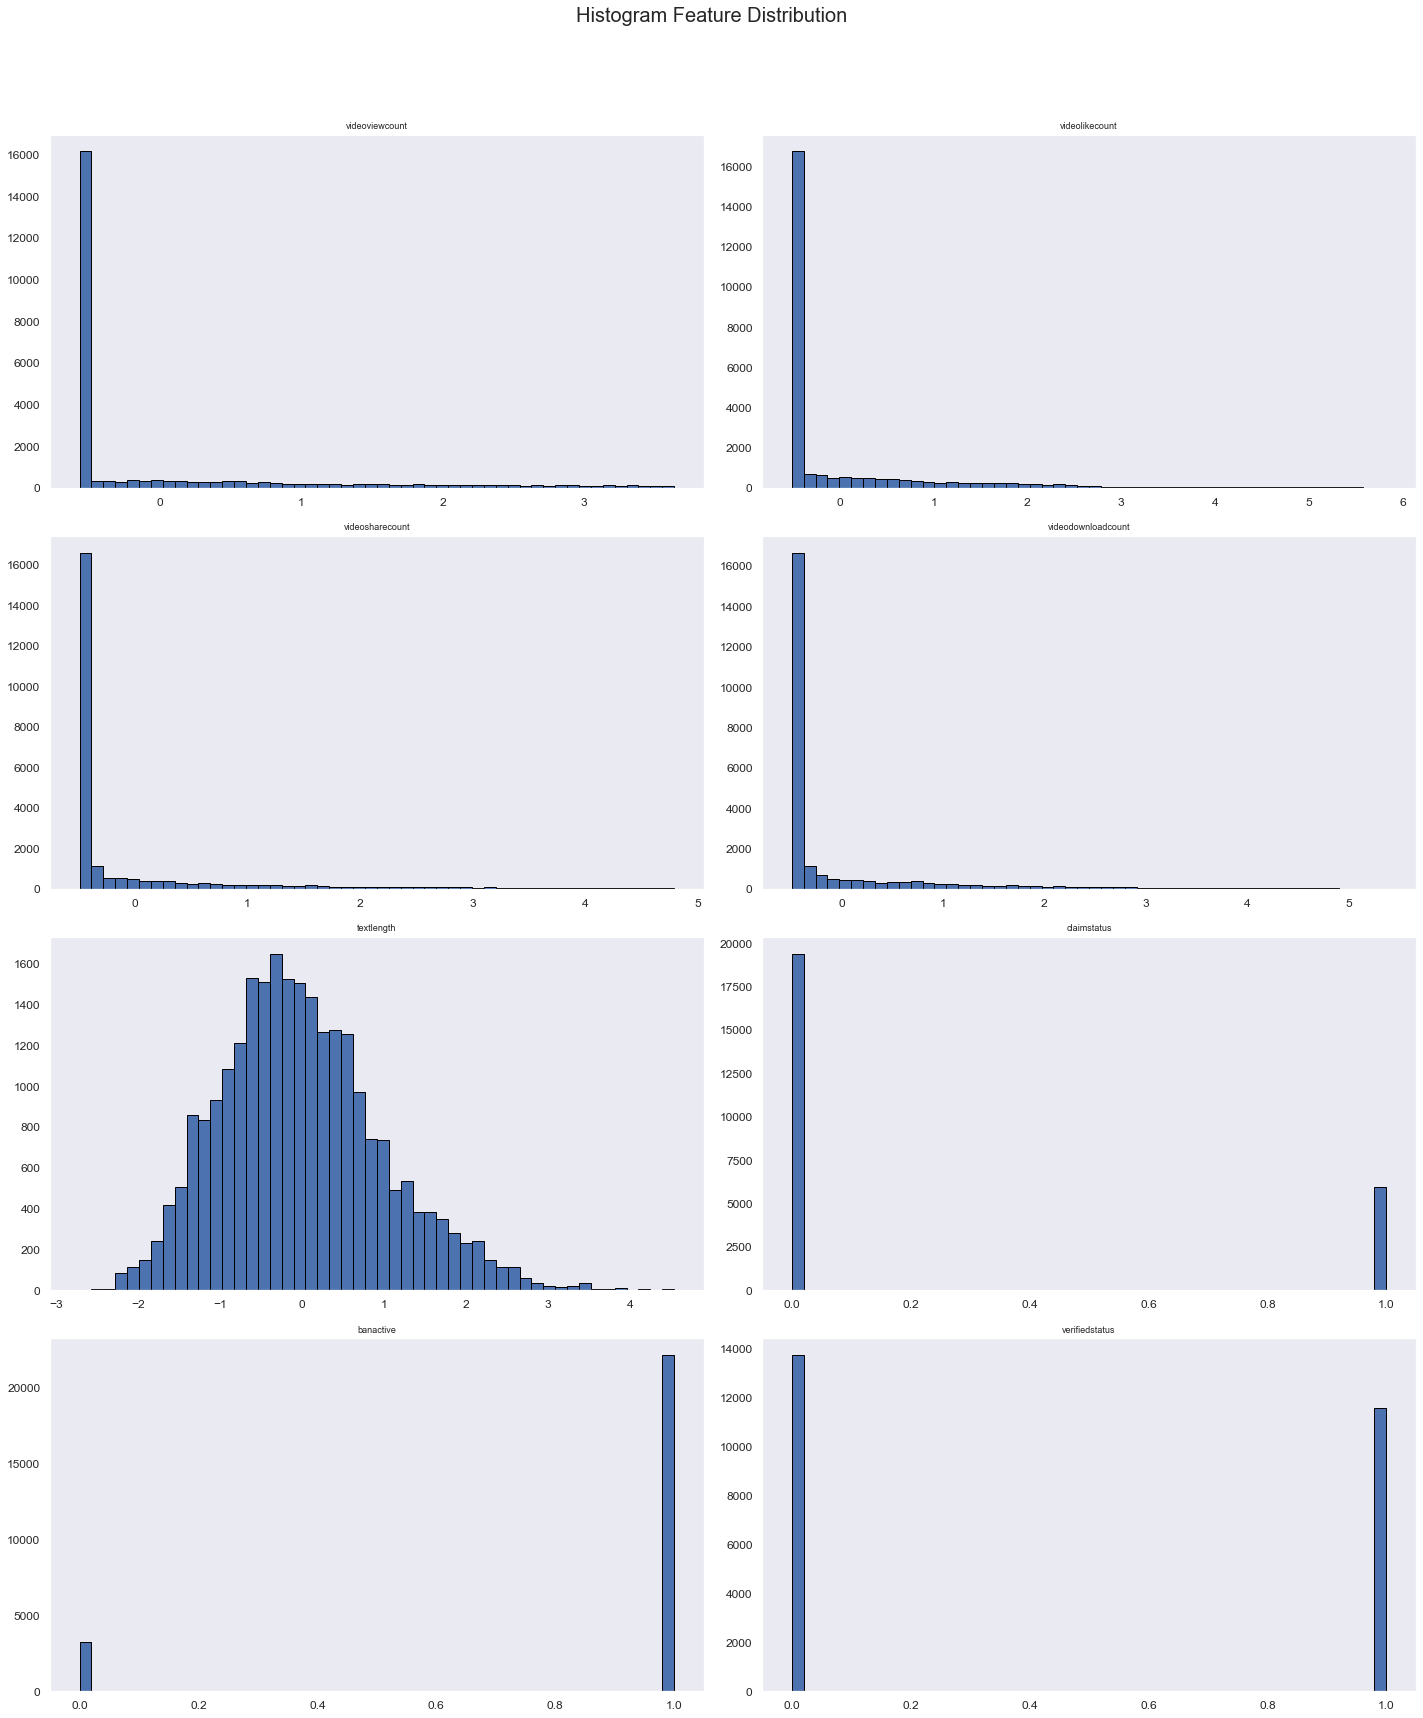

In [13]:
df2.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df2.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

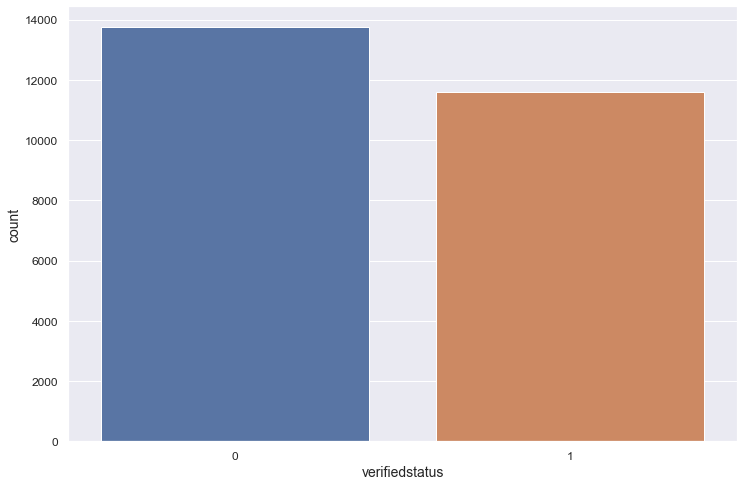

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df2.verifiedstatus, data=df2)
plt.show()

In [ ]:
df2.corr()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Create a small dataset

In [16]:
df = df2.sample(frac=0.35)

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.53,-0.51,-0.48,-0.49,-0.84,0,1,0
1,-0.55,-0.51,-0.47,-0.49,-0.60,0,1,0
2,-0.54,-0.49,-0.45,-0.48,-0.60,1,1,0
3,0.30,0.20,0.35,-0.21,0.02,0,1,0
4,-0.53,-0.44,-0.43,-0.37,-0.89,0,1,0


In [19]:
df.shape

(8868, 8)

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [20]:
df.shape

(8868, 8)

In [21]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [22]:
Counter(y)

Counter({0: 4816, 1: 4052})

In [23]:
X.values, y.values

(array([[-0.52572513, -0.50587718, -0.48333785, ..., -0.84131796,
          0.        ,  1.        ],
        [-0.54589151, -0.50587718, -0.47261525, ..., -0.60105812,
          0.        ,  1.        ],
        [-0.54079211, -0.48547904, -0.45431688, ..., -0.60105812,
          1.        ,  1.        ],
        ...,
        [ 0.49903996,  2.90823296,  1.353608  , ...,  0.2638773 ,
          1.        ,  1.        ],
        [ 3.37388267,  4.26204897,  1.92901576, ...,  1.17686469,
          1.        ,  1.        ],
        [-0.56157648, -0.51224518, -0.48776676, ..., -0.64911009,
          1.        ,  1.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7094, 7), (1774, 7), (7094,), (1774,))

In [26]:
Counter(y_train), Counter(y_test)

(Counter({0: 3853, 1: 3241}), Counter({0: 963, 1: 811}))

**==================================================================================================================**

## Create a random dataset for Hyperparameter Tuning

In [27]:
df_random = df2.sample(n=1000)

In [28]:
df_random.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
7303,-0.33,-0.14,0.09,-0.11,-0.31,0,1,0
13727,-0.53,-0.50,-0.47,-0.47,-0.75,0,1,0
12129,2.58,1.49,1.67,1.39,-0.02,0,1,0
16045,0.32,1.97,3.61,2.63,0.42,0,1,1
6205,-0.27,0.18,0.10,0.21,1.66,0,1,0


In [29]:
df_random.shape

(1000, 8)

In [30]:
X_random = df_random.iloc[:,:7]
y_random = df_random.iloc[:,7]

In [31]:
X_random.values, y_random.values

(array([[-0.32597829, -0.143271  ,  0.0878741 , ..., -0.31274631,
          0.        ,  1.        ],
        [-0.52952971, -0.50269318, -0.47191594, ..., -0.74521402,
          0.        ,  1.        ],
        [ 2.58056226,  1.48767621,  1.67050767, ..., -0.02443451,
          0.        ,  1.        ],
        ...,
        [-0.56348507, -0.51282035, -0.48811641, ...,  0.02361746,
          1.        ,  1.        ],
        [-0.53232534, -0.45690521, -0.45256863, ..., -0.21664238,
          0.        ,  1.        ],
        [-0.55160048, -0.49153891, -0.44336117, ..., -1.32183764,
          0.        ,  0.        ]]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
   

In [32]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=0, stratify=y_random)

In [33]:
X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape

((800, 7), (200, 7), (800,), (200,))

**=================================================================================================================**

## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

# Hyperparameter Tuning

## RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [34]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [35]:
parameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [36]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [37]:
lr_randm = RandomizedSearchCV(estimator=logreg, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [38]:
%%time
lr_randm.fit(X_random_train, y_random_train)

CPU times: total: 250 ms
Wall time: 4.97 s


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=0),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   refit='roc_auc',
                   scoring={'precision', 'roc_auc', 'recall', 'f1', 'accuracy'})

In [39]:
lr_randm.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')

In [40]:
lr_randm.best_score_

0.6613632342374529

In [41]:
lr_randm.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}

In [42]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [43]:
# Get all CV scores
lr_cv_results = make_results('Logistic Regression', lr_randm, 'roc_auc')
lr_cv_results

,Model,Precision,Recall,F1,Accuracy,ROC-AUC
0,Logistic Regression,0.55,0.93,0.69,0.63,0.66


### Logistic Regression model

In [44]:
logreg = LogisticRegression( penalty='l1', C=0.1, max_iter=1000, random_state=0, solver='saga')

In [45]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')

In [46]:
logreg_pred = logreg.predict(X_test)

In [47]:
logreg_pred[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [48]:
logreg.coef_

array([[ 0.04350139, -0.15324735,  0.13791277,  0.00053801,  0.03514804,
        -2.26334891,  0.08591571]])

In [49]:
logreg.intercept_

array([0.15122746])

In [50]:
logreg.score(X_train, y_train)

0.635607555680857

In [51]:
logreg.score(X_test, y_test)

0.6544532130777903

In [65]:
comparedf = pd.DataFrame({"True Value" : y_test , 
                          "Predicted Value" : logreg_pred})

In [66]:
comparedf

,True Value,Predicted Value
3028,0,0
5768,0,1
857,0,0
4565,0,0
6174,1,1
...,...,...
6051,0,0
7569,0,0
6825,0,0
7213,0,0


### Logistic Model Evaluation

In [67]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.87      0.43      0.57       963
           1       0.58      0.93      0.71       811

    accuracy                           0.65      1774
   macro avg       0.72      0.68      0.64      1774
weighted avg       0.74      0.65      0.64      1774



In [68]:
cm = confusion_matrix(y_test,logreg_pred)
cm

array([[410, 553],
       [ 60, 751]], dtype=int64)

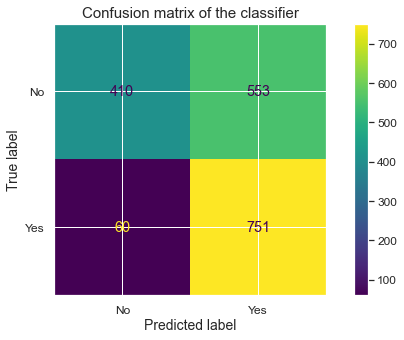

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

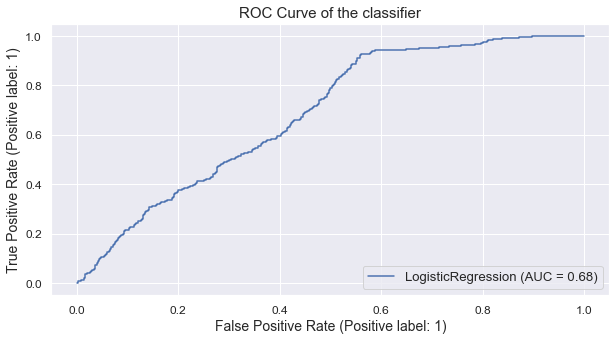

In [70]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [71]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [72]:
# estimate generalization error
clf = cross_validate(estimator=logreg,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [73]:
# mean test set roc-auc
clf["test_score"].mean()

0.6850334460777189

In [74]:
# mean train set roc-auc
clf["train_score"].mean()

0.6885925930643003

In [76]:
lrtable = pd.DataFrame()
lrtable = lrtable.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, logreg_pred),
                        'Recall': recall_score(y_test, logreg_pred),
                        'Precision': precision_score(y_test, logreg_pred),
                        'Accuracy': accuracy_score(y_test, logreg_pred),
                        'ROC-AUC': roc_auc_score(y_test, logreg_pred)
                      },
                        ignore_index=True)
                     
lrtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.71,0.93,0.58,0.65,0.68


**==================================================================================================================**

## ***k***-nearest neighbor (***k***-NN)

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

## RandomSearchCV

In [77]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", n_jobs=2)

In [78]:
parameters = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
               'weights' : ['uniform', 'distance'],
               'algorithm':  ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

In [79]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [80]:
knn_randm = RandomizedSearchCV(estimator=knn, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [81]:
%%time
knn_randm.fit(X_random, y_random)

CPU times: total: 344 ms
Wall time: 6.5 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=2), n_iter=55,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']},
                   refit='roc_auc',
                   scoring={'precision', 'roc_auc', 'recall', 'f1', 'accuracy'})

In [82]:
knn_randm.best_estimator_

KNeighborsClassifier(algorithm='brute', n_jobs=2, n_neighbors=10,
                     weights='distance')

In [83]:
knn_randm.best_score_

0.7140631029395075

In [84]:
knn_randm.best_params_

{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'brute'}

In [85]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [86]:
# Call the function on our model
knn_cv_result_table = make_results("KNN Classifier", knn_randm, "roc_auc")
knn_cv_result_table

,Model,Precision,Recall,F1,Accuracy,ROC-AUC
0,KNN Classifier,0.59,0.70,0.64,0.65,0.71


### KNN Model

In [87]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance", algorithm="brute")

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')

In [89]:
knnpred = knn.predict(X_test)

In [90]:
knnpred[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [91]:
knncomparedf = pd.DataFrame({"True Value" : y_test , 
                          "Predicted Value" : knnpred})

In [92]:
knncomparedf

,True Value,Predicted Value
3028,0,0
5768,0,0
857,0,0
4565,0,0
6174,1,1
...,...,...
6051,0,0
7569,0,0
6825,0,0
7213,0,0


In [93]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       963
           1       0.71      0.91      0.80       811

    accuracy                           0.79      1774
   macro avg       0.81      0.80      0.79      1774
weighted avg       0.82      0.79      0.79      1774



In [95]:
cm = confusion_matrix(y_test,knnpred)
cm

array([[664, 299],
       [ 70, 741]], dtype=int64)

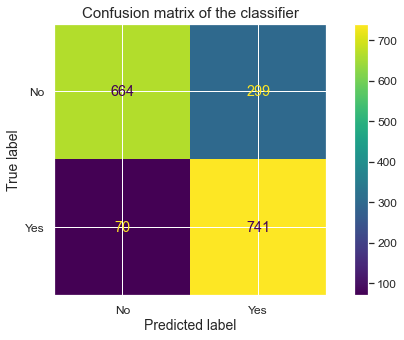

In [94]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=knn, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

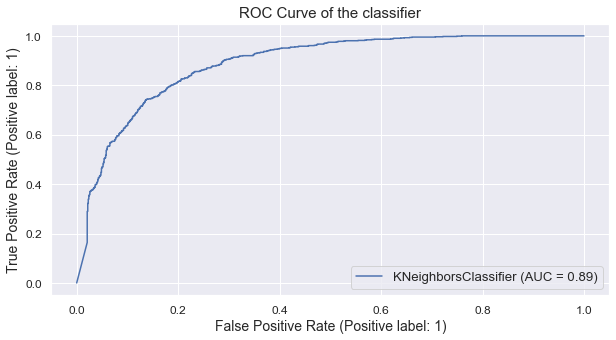

In [96]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=knn, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [97]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [98]:
# estimate generalization error
clf = cross_validate(estimator=knn,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [99]:
# mean test set roc-auc
clf["test_score"].mean()

0.8725534718815263

In [100]:
# mean train set roc-auc
clf["train_score"].mean()

1.0

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [ ]:
### BEGIN SOLUTION
max_k = 10
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [ ]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
#plt.savefig('knn_f1.png')
plt.show()

In [ ]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')
plt.show()

In [101]:
knntable = pd.DataFrame()
knntable = knntable.append({'Model': "KNN Classifcation",
                        'F1':  f1_score(y_test, knnpred),
                        'Recall': recall_score(y_test, knnpred),
                        'Precision': precision_score(y_test, knnpred),
                        'Accuracy': accuracy_score(y_test, knnpred),
                        'ROC-AUC': roc_auc_score(y_test, knnpred)
                      },
                        ignore_index=True)
                     
knntable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,KNN Classifcation,0.80,0.91,0.71,0.79,0.80


**=================================================================================================================**

## Naive Bayes

In [102]:
# Fit the model
gnb = GaussianNB()

In [103]:
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
# Get the predictions on test data
gnb_preds = gnb.predict(X_test)

In [105]:
gnb_preds[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [106]:
nbcomparedf = pd.DataFrame({"True Value" : y_test , 
                          "Predicted Value" : gnb_preds})

In [107]:
nbcomparedf

,True Value,Predicted Value
3028,0,0
5768,0,1
857,0,0
4565,0,0
6174,1,1
...,...,...
6051,0,0
7569,0,0
6825,0,0
7213,0,0


### Naive Bayes Model Evaluation

In [108]:
print(classification_report(y_test,gnb_preds))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57       963
           1       0.57      0.87      0.69       811

    accuracy                           0.64      1774
   macro avg       0.69      0.66      0.63      1774
weighted avg       0.70      0.64      0.62      1774



In [109]:
cm = confusion_matrix(y_test,gnb_preds)
cm

array([[420, 543],
       [102, 709]], dtype=int64)

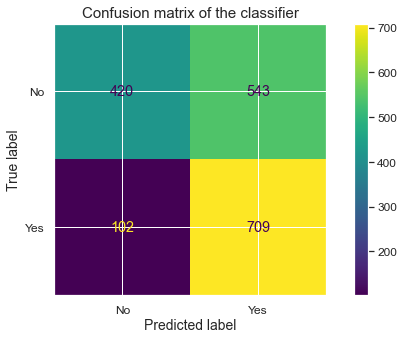

In [110]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=gnb, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

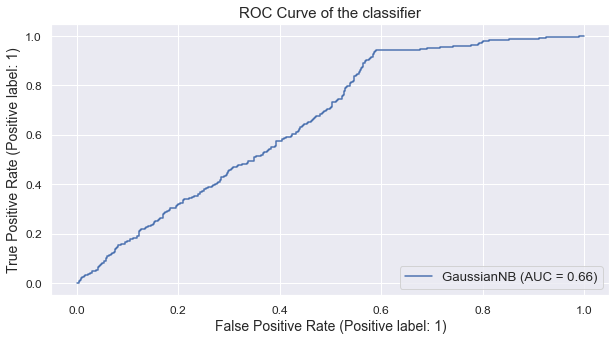

In [111]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=gnb, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

In [112]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, gnb_preds))
print('Precision:', '%.3f' % precision_score(y_test, gnb_preds))
print('Recall:', '%.3f' % recall_score(y_test, gnb_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, gnb_preds))

Accuracy: 0.636
Precision: 0.566
Recall: 0.874
F1 Score: 0.687


In [114]:
nbtable = pd.DataFrame()
nbtable = nbtable.append({'Model': "Naive Bayes Classifcation",
                        'F1':  f1_score(y_test, gnb_preds),
                        'Recall': recall_score(y_test, gnb_preds),
                        'Precision': precision_score(y_test, gnb_preds),
                        'Accuracy': accuracy_score(y_test, gnb_preds),
                        'ROC-AUC': roc_auc_score(y_test, gnb_preds)
                      },
                        ignore_index=True)
                     
nbtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Naive Bayes Classifcation,0.69,0.87,0.57,0.64,0.66


**=================================================================================================================**

# Model Comparison

Create a table of results to compare model performance.

In [115]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append(lrtable,
                     ignore_index=True
                    )

table = table.append(knntable,
                     ignore_index=True
                    )

table = table.append(nbtable,
                     ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.71,0.93,0.58,0.65,0.68
1,KNN Classifcation,0.80,0.91,0.71,0.79,0.80
2,Naive Bayes Classifcation,0.69,0.87,0.57,0.64,0.66


**=================================================================================================================**

#### Python code done by Dennis Lam